# Recolección de los Datos.
<div align="center">
    <img src="https://github.com/eotorresmolina/analytics_python/blob/main/images/Pipeline1.png?raw=true"
         width="1000" align="middle">  
</div>

In [1]:
import os
import platform

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import keras
from keras.models import Sequential
from keras.utils import to_categorical

from glob import glob
import gdown

### **Whats-Burning dataset:**

El dataset "whats-burning" pesa alrededor de 500Mbytes y contiene 3801 imágenes a color, por un lado imágenes de incendios y/o fuego y por otro lado imágenes donde no hay fuego o simplemente humo. Cada imagen, al ser de color, cada pixel posee 3 canales de profundidad (R, G, B).

Dataset extraído de la página de "Kaggle: Your Machine Learning and Data Science Community"

<a href="https://www.kaggle.com/escofresco/whats-burning"><h4>Dataset source</h4></a>

In [2]:
# Descargar el dataset.
# Aprovechamos la librería gdown para descargar archivos automáticamente desde Google Drive.
# Hacemos uso de la librería os para tener control de la ruta de descarga.
dataset_name = "whats_burning_dataset"

if os.access(dataset_name, os.F_OK) is False:  # Si no se puede acceder al archivo (dataset)
    if os.access(dataset_name + '.zip', os.F_OK) is False: 
        url = "https://drive.google.com/uc?id=1y6SSwmQOGPVn5b7fNjnKIhxOTpajMSmh&export=download"
        output = dataset_name + '.zip'
        gdown.download(url, output, quiet=False)
    
    !unzip -q whats_burning_dataset.zip
    
else:
    print('El dataset ya se encuentra descargado.')

Downloading...
From: https://drive.google.com/uc?id=1y6SSwmQOGPVn5b7fNjnKIhxOTpajMSmh&export=download
To: /content/whats_burning_dataset.zip
521MB [00:03, 165MB/s]


In [3]:
# Visualizamos los directorios o carpetas usando la librería "os".
dataset = "./burning" # Nombre de la carpeta general.
dataset_folder = os.listdir(dataset)
dataset_folder

['train', 'test']

In [4]:
# Visualizar el contenido de las carpetas.
train_dir = dataset + '/' + dataset_folder[0]
test_dir= dataset + '/' + dataset_folder[1]
#print(train_dir + '     ' + test_dir)

files = os.listdir(train_dir) # Obtengo las salidas.
print('\n', files)
print('\nEl número de Salidas que voy a tener es:', len(files))


 ['not_fire', 'fire']

El número de Salidas que voy a tener es: 2


In [5]:
# Creo el path de la carpeta de "validation"
validation_dir = os.path.join(dataset, 'validation')

# Creo el directorio de "validation" y sus respectivas carpetas.
try:
  os.mkdir(validation_dir)
  os.mkdir(os.path.join(validation_dir, 'not_fire'))
  os.mkdir(os.path.join(validation_dir, 'fire'))
  
  print("Create the directory {}".format(validation_dir))
  print("Create the directory {}".format(os.path.join(validation_dir, 'not_fire')))
  print("Create the directory {}".format(os.path.join(validation_dir, 'not_fire')))

except OSError as error:
  print(error)

Create the directory ./burning/validation
Create the directory ./burning/validation/not_fire
Create the directory ./burning/validation/not_fire


In [6]:
# Compruebo nuevamente las carpetas del dataset
dataset = "./burning" # Nombre de la carpeta general.
dataset_folder = os.listdir(dataset)
print('Contenido del directorio {} es:\n\n{}'.format(dataset, dataset_folder))

Contenido del directorio ./burning es:

['validation', 'train', 'test']


In [7]:
# Visualizo ahora que la carpeta de "validation" tenga las 
# subcarpetas correspondientes
os.listdir(validation_dir)

['not_fire', 'fire']

#### **Conclusiones**
Ahora tenemos creada la carpeta de "validation" y a su vez la misma está dividida en las categorías correspondientes.

A continuación vamos a exportar algunas imágenes de "train" a "validation" por cada categoría.

In [8]:
# Obtenemos las imágenes de cada categoría de la carpeta "train" usando 
# biblioteca glob
train_notfire_img = glob(train_dir + "/" + files[0] + "/**.jpg")
train_fire_img = glob(train_dir + "/" + files[1] + "/**.jpg")

In [9]:
# Obtengo la cantidad de imágenes de cada categoría:
len(train_notfire_img), len(train_fire_img)

(2098, 924)

In [10]:
# Obtengo 10 imágenes de forma random de cada categoría y las 
# muevo hacia la carpeta "fire" y "not_fire" del directorio
# "validation"
import random
from shutil import move

validation_notfire_imgs = random.sample(train_notfire_img, 10)
for img in validation_notfire_imgs:
  move(src=img, dst=os.path.join(validation_dir, "not_fire"))

validation_fire_imgs = random.sample(train_fire_img, 10)
for img in validation_fire_imgs:
  move(src=img, dst=os.path.join(validation_dir, "fire"))

In [13]:
# Se vuelve a ver la cant. de imágenes de cada categoría del
# directorio "train".
train_notfire_img = glob(train_dir + "/" + files[0] + "/**.jpg")
train_fire_img = glob(train_dir + "/" + files[1] + "/**.jpg")
len(train_notfire_img), len(train_fire_img)

(2088, 914)

In [48]:
# Visulizamos la cant. de imágenes de cada categoría del
# directorio "validation".
validation_notfire_img = glob(validation_dir + "/" + files[0] + "/**.jpg")
validation_fire_img = glob(validation_dir + "/" + files[1] + "/**.jpg")
len(validation_notfire_img), len(validation_fire_img)

(10, 10)

#### **Conclusiones**
Ya hemos tomado y separado algunos de los datos/imágenes de "train" y los hemos agregado en "validation".

Ahora se procede a visualizar alguna de las imágenes y se procede a ver las características de cada imagen.

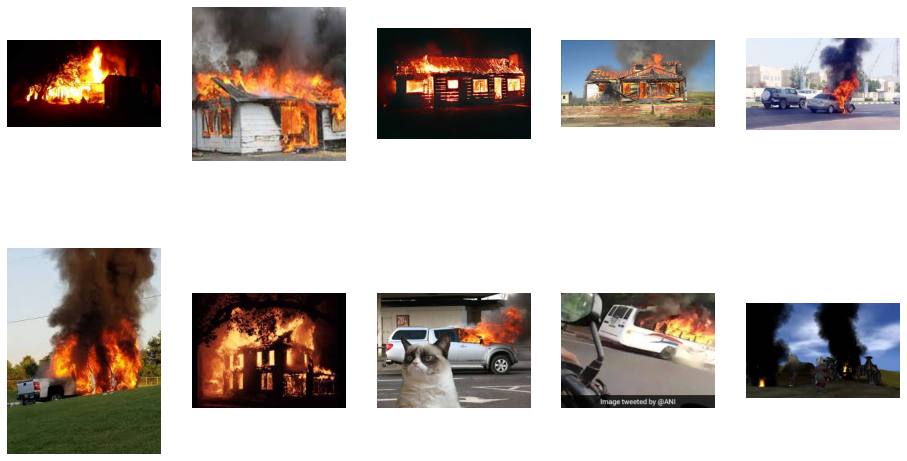

In [49]:
# Visualizar las primeras 10 imágenes de la categoría "fire" de la
# carpeta de "train".
fig1 = plt.figure(figsize=(16, 9))

for i in range(10):
  ax =fig1.add_subplot(2, 5, i+1)
  ax.axis('off')
  img = mpimg.imread(train_fire_img[i])
  plt.imshow(img)

plt.show()

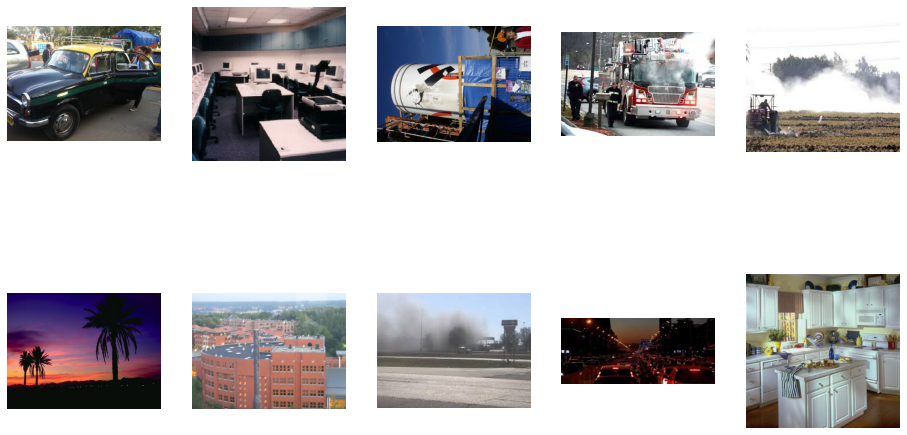

In [50]:
# Visualizar las primeras 10 imágenes de la categoría "not_fire" de la
# carpeta de "train".
fig2 = plt.figure(figsize=(16, 9))

for i in range(10):
  ax =fig2.add_subplot(2, 5, i+1)
  ax.axis('off')
  img = mpimg.imread(train_notfire_img[i])
  plt.imshow(img)

plt.show()

In [51]:
# Visualizamos la dimensión de las 10 imágenes de "fire".
print('Shape:\n')
for i in range(10):
  img = mpimg.imread(train_fire_img[i])
  print(img.shape)

Shape:

(720, 1280, 3)
(225, 225, 3)
(191, 264, 3)
(1080, 1920, 3)
(174, 290, 3)
(260, 194, 3)
(194, 259, 3)
(194, 259, 3)
(180, 240, 3)
(176, 286, 3)


In [52]:
# Visualizamos como están representados los píxeles de
# la 1er imagen de la categoría "fire"
img = mpimg.imread(train_fire_img[0])
print(img[360:365, 635:640, :])

[[[214 180  44]
  [203 169  35]
  [188 154  20]
  [173 139   6]
  [164 130   0]]

 [[201 170  43]
  [192 161  36]
  [181 150  25]
  [170 138  15]
  [163 131   8]]

 [[255 227 110]
  [251 222 105]
  [245 216  99]
  [240 210  96]
  [237 207  93]]

 [[239 217 108]
  [238 216 107]
  [237 214 108]
  [237 214 108]
  [237 214 108]]

 [[255 239 137]
  [255 240 140]
  [255 242 142]
  [255 245 147]
  [255 247 149]]]


#### **Conclusiones**
* Las imágenes tienen distinta resolución(tamaño), por  lo tanto hay que utilizar un tamaño único para que todas las imágenes sean iguales (se elije una resolución de 150x150).
* En las imágenes, cada píxel, como se puede observar, están representados de 0 a 255, por lo hay que normalizar los mismos.

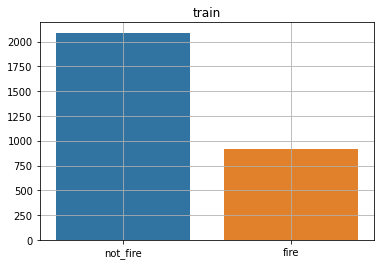

In [58]:
# Realizamos un gráfico de barra para visualizar
# que tan balanceado o desbalanceados están
# las categorías "fire" y "not_fire" de los
# datos de "train".
fig = plt.figure()
ax = fig.add_subplot()
ax.set_title('train')
sns.barplot(x=os.listdir(validation_dir), y=[len(train_notfire_img), len(train_fire_img)], ax=ax)
ax.grid()
plt.show()

#### **Conclusiones**
Observamos que el dataset está bastante desbalanceado. Hay más imágenes de "not_fire" que de "fire".

# Procesamiento de los Datos.
<div align="center">
    <img src="https://github.com/eotorresmolina/analytics_python/blob/main/images/Pipeline2.png?raw=true"
         width=1000 aling="middle">
</div>

# Exploración de los Datos.
<div align="center">
    <img src="https://github.com/eotorresmolina/analytics_python/blob/main/images/Pipeline3.png?raw=true"
         width=1000 aling="middle">
</div>

# Entrenamiento del Modelo.
<div align="center">
    <img src="https://github.com/eotorresmolina/analytics_python/blob/main/images/Pipeline4.png?raw=true"
         width=1000 aling="middle">
</div>

# Validación del Modelo.
<div align="center">
    <img src="https://github.com/eotorresmolina/analytics_python/blob/main/images/Pipeline5.png?raw=true"
         width=1000 aling="middle">
</div>

# Aplicación del Modelo.
<div align="center">
    <img src="https://github.com/eotorresmolina/analytics_python/blob/main/images/Pipeline6.png?raw=true"
         width=1000 aling="middle">
</div>

# Conclusiones.
<div align="center">
    <img src="https://github.com/eotorresmolina/analytics_python/blob/main/images/Pipeline7.png?raw=true"
         width=1000 aling="middle">
</div>